In [7]:
from keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
trans = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot"
]

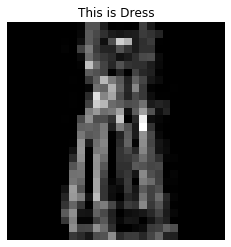

In [15]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
idx = random.randint(0, 59999)
plt.title("This is {}".format(trans[y_train[idx]]))
plt.axis("off")
plt.imshow(x_train[idx], cmap="gray")

In [16]:
# keras: 建立模型兩種方式 Sequential(層疊式) Model(?)
from keras.models import Sequential
# Dense: 全連接層
from keras.layers import Dense
model = Sequential()
# 784 * 128(全連接) + 128(bias) = 100480
model.add(Dense(128, activation="relu", input_dim=784))
# 128 * 10(全連接) + 10(bias) = 1290
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# loss: 跟正確答案的距離
# oprimizer: 梯度下降的優化器
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [18]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [20]:
# batch_size: 看多少筆資料再平均做一次調整, 100~200(建議), 5~20(大圖片)
# epochs: 整份訓練資料到底要看過幾遍(控制模型什麼時候該訓練完成)
# validation_split:(train_test_split)切分多少測試資料出來
# verbose: (log要有多少程度) 1(預設):會有進度條 2: 必要資訊  0: 安靜
# 1 epoch: 多少次梯度下降 54000 / 200 = 270(次)
model.fit(x_train_norm, y_train_cat,
          batch_size=200,
          epochs=5,
          validation_split=0.1,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 1s - loss: 0.2693 - accuracy: 0.9027 - val_loss: 0.3207 - val_accuracy: 0.8852
Epoch 2/5
 - 1s - loss: 0.2593 - accuracy: 0.9055 - val_loss: 0.3165 - val_accuracy: 0.8850
Epoch 3/5
 - 1s - loss: 0.2552 - accuracy: 0.9072 - val_loss: 0.3386 - val_accuracy: 0.8797
Epoch 4/5
 - 1s - loss: 0.2495 - accuracy: 0.9085 - val_loss: 0.3217 - val_accuracy: 0.8832
Epoch 5/5
 - 1s - loss: 0.2409 - accuracy: 0.9131 - val_loss: 0.3185 - val_accuracy: 0.8843


In [21]:
# 先做個loss, accuracy
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.34188760488033293, 0.8773999810218811]

In [22]:
# confusion matrix
# sklearn: predict_proba, predict
# keras: predict, predict_classes
# 如果你要對list裡面所有東西做轉換: list(map(lambda x:x**2, [1, 2, 3]))
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(i) for i in trans]
c = ["{}(預測)".format(i) for i in trans]
mat = confusion_matrix(y_test, pre)
convert = []
for row in mat:
    r = np.array(row) / sum(row) * 100
    r = list(map(lambda x:"{}%".format(round(x, 2)), r))
    convert.append(r)
pd.DataFrame(convert,
             index=i,
             columns=c)

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle Boot(預測)
T-shirt(正確),77.6%,0.1%,1.7%,6.7%,0.5%,0.3%,12.3%,0.0%,0.8%,0.0%
Trouser(正確),0.1%,96.7%,0.0%,2.4%,0.5%,0.0%,0.3%,0.0%,0.0%,0.0%
Pullover(正確),1.0%,0.0%,79.8%,2.0%,9.6%,0.0%,7.5%,0.0%,0.1%,0.0%
Dress(正確),0.9%,0.4%,1.2%,92.5%,2.8%,0.0%,1.8%,0.0%,0.4%,0.0%
Coat(正確),0.0%,0.1%,9.6%,3.7%,81.4%,0.0%,5.1%,0.0%,0.1%,0.0%
Sandal(正確),0.0%,0.0%,0.0%,0.1%,0.0%,96.7%,0.0%,1.4%,0.2%,1.6%
Shirt(正確),8.6%,0.1%,8.4%,5.6%,7.8%,0.0%,68.4%,0.0%,1.1%,0.0%
Sneaker(正確),0.0%,0.0%,0.0%,0.0%,0.0%,2.7%,0.0%,91.0%,0.0%,6.3%
Bag(正確),0.7%,0.0%,0.6%,0.7%,0.7%,0.6%,0.4%,0.3%,96.0%,0.0%
Ankle Boot(正確),0.0%,0.0%,0.0%,0.1%,0.0%,0.8%,0.1%,1.7%,0.0%,97.3%


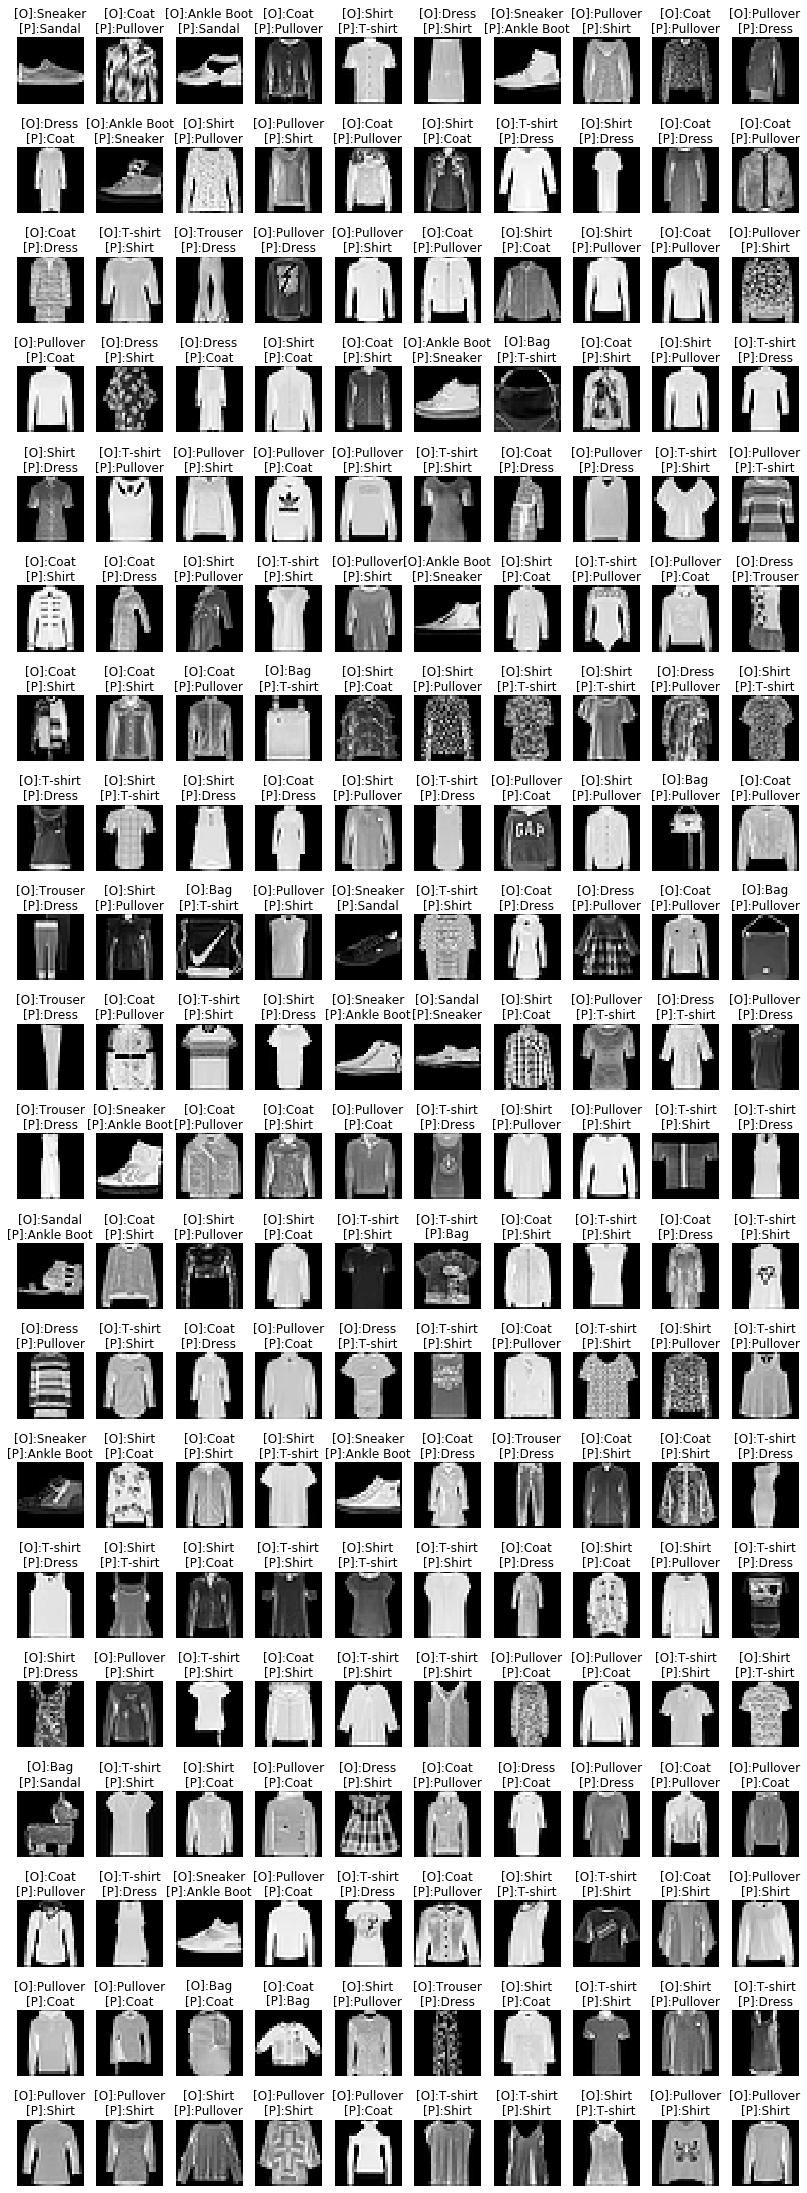

In [24]:
# np: !=來比較每個位置的相等
# nonzero: 找到所有不為0的位置
# [類似list] -> 把所有東西一次拿給你
idx = np.nonzero(pre != y_test)[0][:200]

false_label = y_test[idx]
false_pre = pre[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

false_collection = zip(false_label, false_pre, false_img)
# 得到每一個: (index, (false_label, pre, img))
for i, (l, p, img) in enumerate(false_collection):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[l], trans[p])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

請輸入檔案位址:test.png
機率最高的: T-shirt
是 T-shirt 的機率: 0.46429494
是 Bag 的機率: 0.29796404
是 Pullover 的機率: 0.17982554
是 Shirt 的機率: 0.055369504
是 Dress 的機率: 0.0012133255
是 Coat 的機率: 0.0010901471
是 Trouser 的機率: 0.0002425455
是 Ankle Boot 的機率: 1.1384612e-09
是 Sneaker 的機率: 2.2055094e-10
是 Sandal 的機率: 5.503178e-11


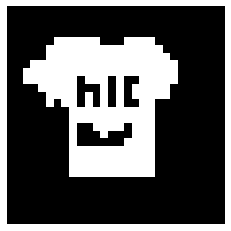

In [27]:
# sorted([("Amy", 5), ("Carol", 4), ("Bob", 3)],
#       key=lambda t:t[1])
from keras.preprocessing.image import load_img
fp = input("請輸入檔案位址:")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(-1, 784) / 255
ans = model.predict_classes(img_np)[0]
print("機率最高的:", trans[ans])
pre = model.predict(img_np)[0]
z = zip(list(range(10)), pre)
for i, p in sorted(z, key=lambda x:x[1], reverse=True):
    print("是", trans[i], "的機率:", p)
plt.axis("off")
plt.imshow(img, cmap="gray")